In [2]:
Pkg.add("Winston")
using Winston

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Winston
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
# Retornando t e w para plotar
function euler_explicito(f, t0, y0, tf; n = 10)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        w[i+1] = w[i] + h*f(t[i],w[i])
    end

    return t, w
end

euler_explicito (generic function with 1 method)

In [5]:
# Retornando t e w para plotar
function taylor2(f, ft, fy, t0, y0, tf; n = 10)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        w[i+1] = w[i] + h*f(t[i],w[i]) +
            0.5h^2*(ft(t[i],w[i]) +
            fy(t[i],w[i])*f(t[i],w[i]))
    end

    return t, w
end

taylor2 (generic function with 1 method)

In [8]:
f(t,y) = y
ft(t,y) = 0
fy(t,y) = 1
t0 = 0
y0 = 1
tf = 1
# Quero y(1)
# Solucao: y(t) = exp(t)
teuler, weuler = euler_explicito(f, t0, y0, tf);
println("y(1) ≈ $(weuler[end])")
tT2, wT2 = taylor2(f, ft, fy, t0, y0, tf);
println("y(1) ≈ $(wT2[end])")

y(1) ≈ 2.5937424601
y(1) ≈ 2.7140808466082245


In [12]:
for n = 10:10:100
    teuler, weuler = euler_explicito(f, t0, y0, tf, n=n);
    println("y(1) Euler: $n ≈ $(weuler[end]-e)")
    tT2, wT2 = taylor2(f, ft, fy, t0, y0, tf, n=n);
    println("y(1) Taylor2: $n ≈ $(wT2[end]-e)")
end

y(1) Euler: 10 ≈ -0.124539368359045
y(1) Taylor2: 10 ≈ -0.004200981850820629
y(1) Euler: 20 ≈ -0.06498412331462378
y(1) Taylor2: 20 ≈ -0.0010907741041603636
y(1) Euler: 30 ≈ -0.043963052588749996
y(1) Taylor2: 30 ≈ -0.0004909242801605096
y(1) Euler: 40 ≈ -0.03321799006907167
y(1) Taylor2: 40 ≈ -0.00027788408806905807
y(1) Euler: 50 ≈ -0.02669379938543992
y(1) Taylor2: 50 ≈ -0.0001785163878693652
y(1) Euler: 60 ≈ -0.022311689128819978
y(1) Taylor2: 60 ≈ -0.00012428094618410768
y(1) Euler: 70 ≈ -0.019165457482850812
y(1) Taylor2: 70 ≈ -9.147205934256775e-5
y(1) Euler: 80 ≈ -0.016796887705706975
y(1) Taylor2: 80 ≈ -7.012735968903172e-5
y(1) Euler: 90 ≈ -0.014949367400848068
y(1) Taylor2: 90 ≈ -5.546713269710679e-5
y(1) Euler: 100 ≈ -0.013467999037519274
y(1) Taylor2: 100 ≈ -4.496589908686843e-5


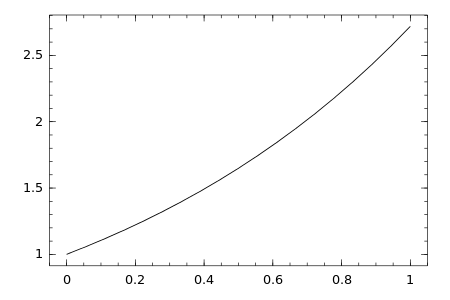

In [26]:
y(t) = exp(t)
fplot(y, [0,1])

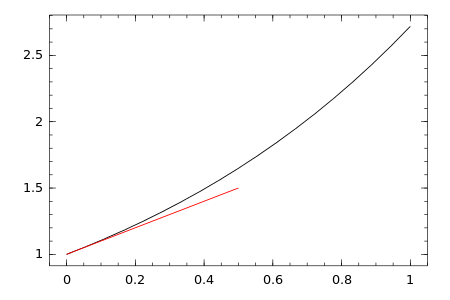

In [27]:
h = 0.5
# Euler
w1 = 1 + h*1
oplot([0 h], [1 w1], "r")

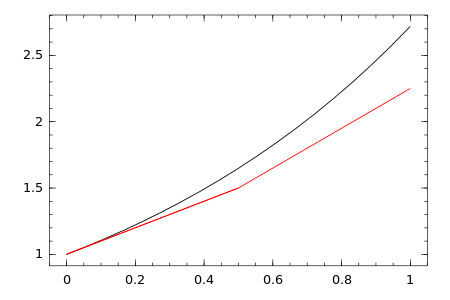

In [28]:
# Euler
w2 = w1 + h*w1
oplot([0 h 2h], [1 w1 w2], "r")

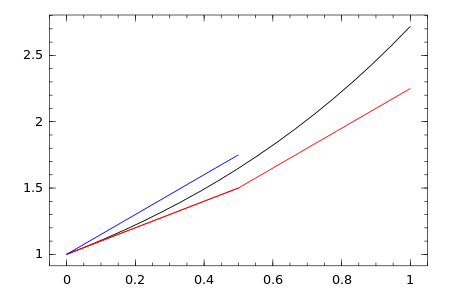

In [29]:
# Euler
oplot([0 h], [1 w2-w1+1], "b")

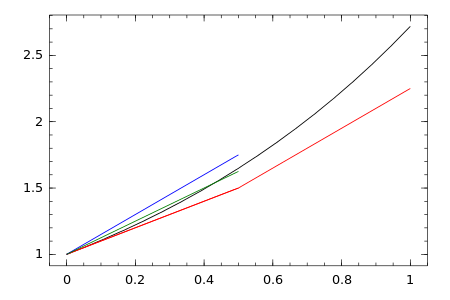

In [30]:
w2til = 1 + w2 - w1
w2tiltil = (w1 + w2til)/2
oplot([0 h], [1 w2tiltil], "g")

In [31]:
# Usando a inclinacao direto:
# Iria para
w0 = y0
inclinacao1 = f(1, w0)
w1quenaovou = w0 + h*inclinacao1
inclinacao2 = f(1+h,w1quenaovou)
w1 = w0 + h*(inclinacao1 + inclinacao2)/2

1.625

  likely near In[33]:1
  likely near In[33]:1
  likely near In[33]:1
in __fplot#84__ at /home/lamind-admin/.julia/v0.4/Winston/src/plot.jl:572
  likely near In[33]:1
in __fplot#84__ at /home/lamind-admin/.julia/v0.4/Winston/src/plot.jl:572
  likely near In[33]:1
in __fplot#84__ at /home/lamind-admin/.julia/v0.4/Winston/src/plot.jl:572


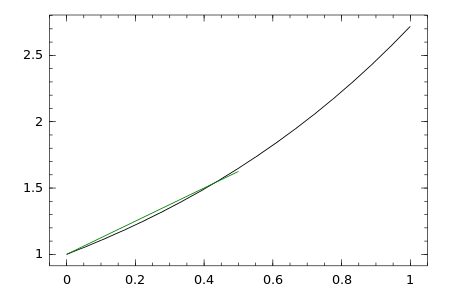

In [33]:
fplot(y, [0 1])
oplot([0 h], [w0 w1], "g")

In [ ]:
# Retornando t e w para plotar
function rungekutta2(f, t0, y0, tf; n = 10,
        α = 0, β = 0, γ = 0, δ = 0)
    t = linspace(t0, tf, n+1) # ou t = 0.0:h:1.0
    w = zeros(n+1) # Vetor
    w[1] = y0
    h = (tf-t0)/n

    for i = 1:n
        w[i+1] = w[i] + h*f(t[i],w[i]) +
            0.5h^2*(ft(t[i],w[i]) +
            fy(t[i],w[i])*f(t[i],w[i]))
    end

    return t, w
end